Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
w = linalg.inv(fi.T @ fi) @ fi.T @ y 
print(w)
w2 = linalg.pinv(fi) @ y
print(w2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
h = w @ fi.T
E = 0
for i in range(len(y)):
    E += (y[i] - h[i])**2
E /= 2
print(E)

E2 = mean_squared_error(y, h)
print(E2)

4.085714285714285
2.0428571428571427


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
try:
    w3 = np.linalg.inv(fi) @ y
    print(w3)
except:
    print("Impossible to calculate, matrix is not square!")

Impossible to calculate, matrix is not square!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)

h2 = reg.predict(X)
print(mean_squared_error(y, h2))

2.2 [0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal

def make_labels(X, f, noise=0):
    y = []
    for i in range(len(X)):
        y.append(f(X[i]) + normal(0, noise))
    return y

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
def f(x):
    return 5 + x - 2 * x**2 - 5 * x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

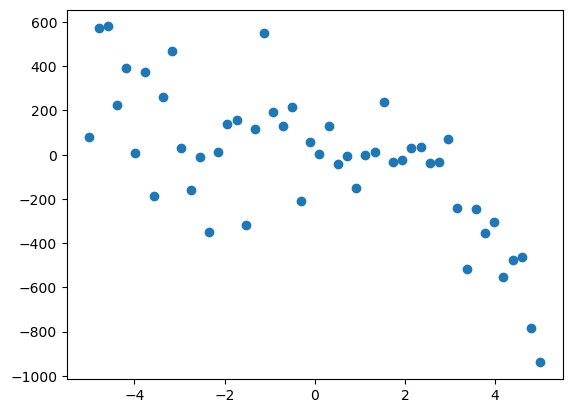

In [11]:
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

33839.668059525204


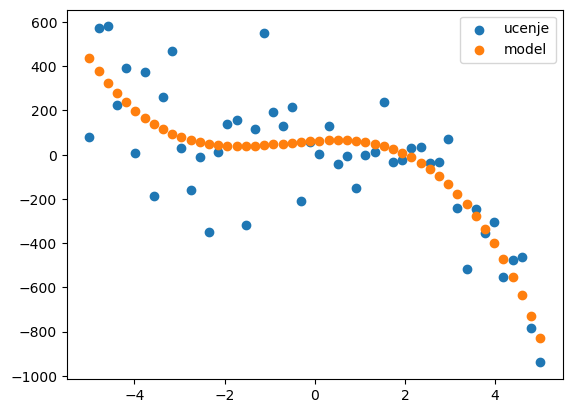

In [12]:
poly2 = PolynomialFeatures(3)
fi_pol = poly2.fit_transform(X)
w_pol = linalg.pinv(fi_pol) @ y
h_pol = w_pol.T @ fi_pol.T
print(mean_squared_error(y, h_pol.T))

plt.scatter(X, y, label='ucenje')
plt.scatter(X, h_pol, label='model')
plt.legend(loc="best")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Mean squared error for d=1: 52691.15783192195
Mean squared error for d=3: 33839.668059525204
Mean squared error for d=5: 33742.20913286328
Mean squared error for d=10: 28420.631904647817
Mean squared error for d=20: 21919.556839263503


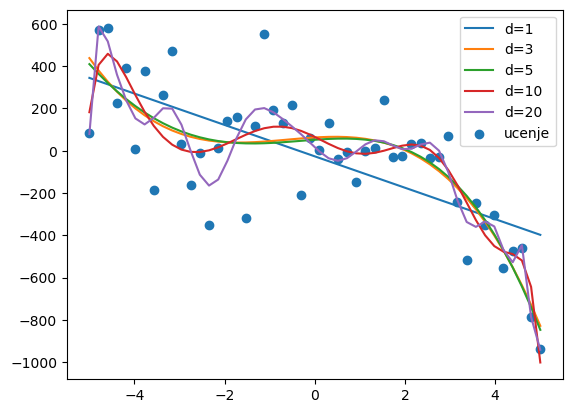

In [13]:
d = [1, 3, 5, 10, 20]

for i in d:
    poly_d = PolynomialFeatures(i)
    fi_d = poly_d.fit_transform(X)
    w_d = linalg.pinv(fi_d) @ y
    h_d = w_d.T @ fi_d.T
    print(f"Mean squared error for d={i}: {mean_squared_error(y, h_d.T)}")
    plt.plot(X, h_d.T, label=f'd={i}')
plt.scatter(X, y, label='ucenje')
plt.legend(loc="best")
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

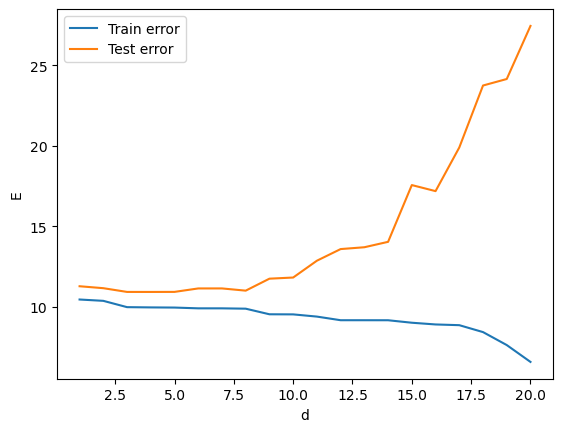

In [14]:
from sklearn.model_selection import train_test_split
d = [i for i in range(1,21)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
train_err = []
test_err = []

for i in d:
    poly_d = PolynomialFeatures(i)
    fi_d_train = poly_d.fit_transform(X_train)
    fi_d_test = poly_d.fit_transform(X_test)
    w_d = linalg.pinv(fi_d_train) @ y_train
    h_d_train = w_d.T @ fi_d_train.T
    h_d_test = w_d.T @ fi_d_test.T
    train_err.append(np.log(mean_squared_error(y_train, h_d_train.T)))
    test_err.append(np.log(mean_squared_error(y_test, h_d_test.T)))
    
plt.plot(d, train_err, label='Train error')
plt.plot(d, test_err, label='Test error')
plt.xlabel("d")
plt.ylabel("E")
plt.legend(loc="best")
    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

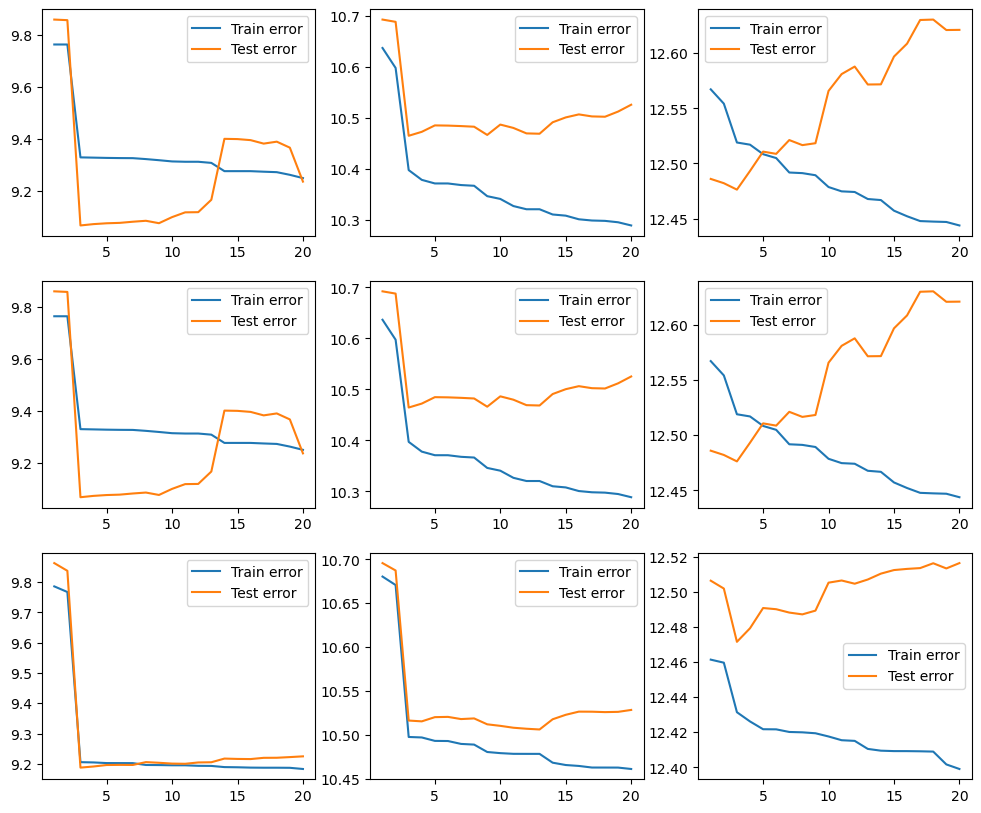

In [15]:
X = make_instances(-5, 5, 1000)
y1  = make_labels(X, f, noise=100)
y2  = make_labels(X, f, noise=200)
y3  = make_labels(X, f, noise=500)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.5)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.5)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.5)

all_data = [((X_train1, y_train1), (X_test1, y_test1)), ((X_train2, y_train2), (X_test2, y_test2)), ((X_train3, y_train3), (X_test3, y_test3))]
noises = [100, 200, 500]
N = [len(X_train1)//3, len(X_train1)//3, len(X_train1)]

fig, ax = plt.subplots(3, 3, figsize=(12, 10))

for n, size in enumerate(N):    
    for i, data in enumerate(all_data):
        (X_train, y_train), (X_test, y_test) = data
        train_err = []
        test_err = []
    
        for j in d:
            poly_d = PolynomialFeatures(j)
            fi_d_train = poly_d.fit_transform(X_train[:size])
            fi_d_test = poly_d.fit_transform(X_test[:size])
            w_d = linalg.pinv(fi_d_train) @ y_train[:size]
            h_d_train = w_d.T @ fi_d_train.T
            h_d_test = w_d.T @ fi_d_test.T
            train_err.append(np.log(mean_squared_error(y_train[:size], h_d_train.T)))
            test_err.append(np.log(mean_squared_error(y_test[:size], h_d_test.T)))
        
        slot = (i+1) + len(all_data) * n  
        ax[n, i].plot(d, train_err, label='Train error')
        ax[n, i].plot(d, test_err, label='Test error')
        ax[n, i].legend(loc="best")
    




***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [75]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
lambdas = [0, 1, 10]
N = len(X)

for l in lambdas:
    lambda_matrix = np.zeros((N, N))
    np.fill_diagonal(lambda_matrix, l)
    lambda_matrix[0,0] =0
    poly = PolynomialFeatures(3)
    fi = poly.fit_transform(X)
    w = linalg.inv(fi.T @ fi + lambda_matrix) @ fi.T @ y
    print(f"For lambda = "
          f"{l}, w:\n{w}")
    
# np.fill nasao na https://stackoverflow.com/questions/71442528/a-better-way-to-create-an-nxn-matrix-with-specific-diagonal-and-off-diagonal-el

For lambda = 0, w:
[ 4.         -5.91666667  3.375      -0.45833333]
For lambda = 1, w:
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
For lambda = 10, w:
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [77]:
from sklearn.linear_model import Ridge
for l in lambdas:
    poly = PolynomialFeatures(3)
    fi = poly.fit_transform(X)
    ridge = Ridge(l)
    ridge.fit(fi, y)
    print(ridge.coef_, ridge.intercept_)

[ 0.         -5.91666667  3.375      -0.45833333] 4.000000000000025
[ 0.         -0.69079365 -0.2831746   0.1445805 ] 3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ] 2.4944418431229733


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

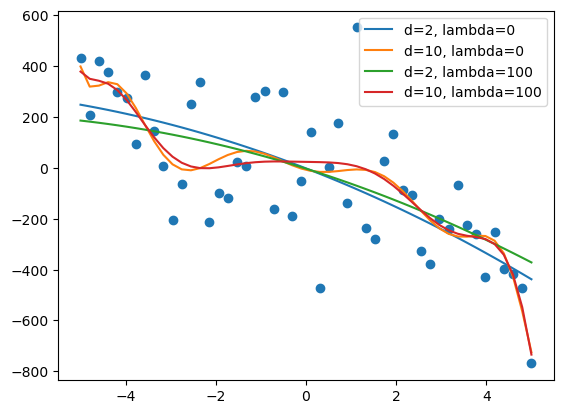

In [100]:
lambdas = [0, 100]
d = [2, 10]
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise = 200)
plt.scatter(X, y)

for l in lambdas:
    for i in d:
        poly = PolynomialFeatures(i)
        fi = poly.fit_transform(X)
        # lambda_matrix = np.zeros((fi.shape[1], fi.shape[1]))
        # np.fill_diagonal(lambda_matrix, l)
        # lambda_matrix[0,0] =0
        ridge = Ridge(l)
        ridge.fit(fi, y)
        h = ridge.predict(fi)
        # w = linalg.inv(fi.T @ fi + lambda_matrix) @ fi.T @ y
        # h = w.T @ fi.T
        plt.plot(X, h, label=f'd={i}, lambda={l}')
plt.legend(loc="best")
plt.show()

# poly = PolynomialFeatures(10)
# fi = poly.fit_transform(X)
# lambda_matrix = np.zeros((fi.shape[1], fi.shape[1]))
# np.fill_diagonal(lambda_matrix, 100)
# lambda_matrix[0,0] =0
# w = linalg.inv(fi.T @ fi + lambda_matrix) @ fi.T @ y
# h = w.T @ fi.T
# plt.plot(X, h.T)
# plt.show()
# 
# poly = PolynomialFeatures(10)
# fi = poly.fit_transform(X)
# lambda_matrix = np.zeros((fi.shape[1], fi.shape[1]))
# np.fill_diagonal(lambda_matrix, 0)
# lambda_matrix[0,0] =0
# w = linalg.inv(fi.T @ fi + lambda_matrix) @ fi.T @ y
# h = w.T @ fi.T
# plt.plot(X, h.T)

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


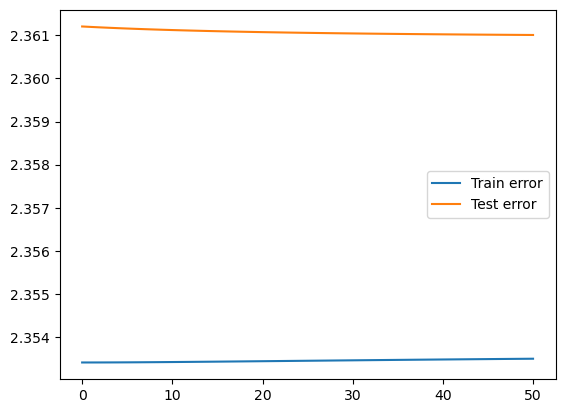

In [104]:
X = make_instances(-5, 5, 1000)
y  = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lambdas = range(0, 51)
d = 10
train_err = []
test_err = []
poly_d = PolynomialFeatures(d)
fi_train = poly_d.fit_transform(X_train)
fi_test = poly_d.fit_transform(X_test)

for l in lambdas:
    
    # lambda_matrix = np.zeros((fi_train.shape[1], fi_train.shape[1]))
    # np.fill_diagonal(lambda_matrix, l)
    # lambda_matrix[0,0] = 0
    # w = linalg.inv(fi_train.T @ fi_train + lambda_matrix) @ fi_train.T @ y_train
    # h_train = w.T @ fi_train.T
    # h_test = w.T @ fi_test.T
    ridge = Ridge(l)
    ridge.fit(fi_train, y_train)
    h_train = ridge.predict(fi_train)
    h_test = ridge.predict(fi_test)
    train_err.append(np.log(mean_squared_error(y_train, h_train)))
    test_err.append(np.log(mean_squared_error(y_test, h_test)))

plt.plot(lambdas, np.log(train_err), label="Train error")
plt.plot(lambdas, np.log(test_err), label="Test error")
plt.legend(loc="best")

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Postotak tezina jednak nuli za lambda = 100: 0.0


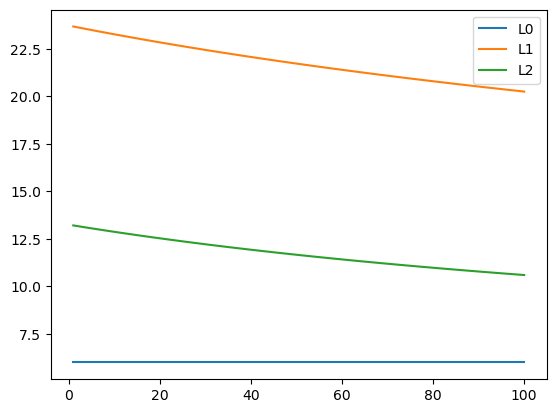

In [109]:
from sklearn.linear_model import Ridge
X = make_instances(-5, 5, 1000)
y  = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lambdas = range(1, 101)
d = 5
w0 = []
w1 = []
w2 = []
w_last = 0

for l in lambdas:
    poly_d = PolynomialFeatures(d)
    fi_train = poly_d.fit_transform(X_train)
    fi_test = poly_d.fit_transform(X_test)
    lambda_matrix = np.zeros((fi_train.shape[1], fi_train.shape[1]))
    np.fill_diagonal(lambda_matrix, l)
    lambda_matrix[0,0] = 0
    w = linalg.inv(fi_train.T @ fi_train + lambda_matrix) @ fi_train.T @ y_train
    w0.append(np.count_nonzero(w))
    w1.append(np.linalg.norm(w, 1))
    w2.append(np.linalg.norm(w, 2))
    if l == 100:
        w_last = w
    
plt.plot(lambdas, w0, label="L0")
plt.plot(lambdas, w1, label="L1")
plt.plot(lambdas, w2, label="L2")       
plt.legend(loc="best")
    
print(f"Postotak tezina jednak nuli za lambda = 100: {(len(w_last) - nonzeroes(w_last)) / len(w_last)}")


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

Postotak tezina jednak nuli za lambda = 100: 0.3333333333333333


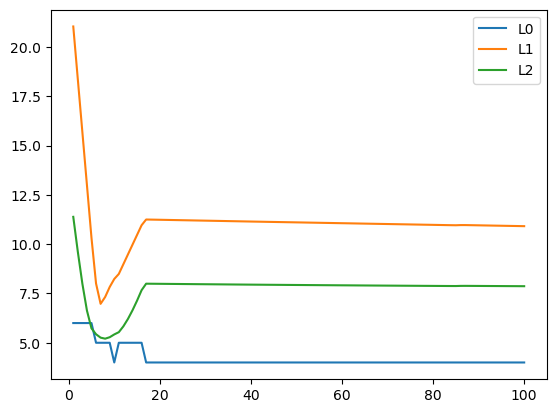

In [110]:
from sklearn.linear_model import Lasso

w_last = 0
w0 = []
w1 = []
w2 = []

for l in lambdas:
    poly_d = PolynomialFeatures(d)
    fi_train = poly_d.fit_transform(X_train)
    fi_test = poly_d.fit_transform(X_test)
    lasso = Lasso(l)
    lasso.fit(fi_train, y_train)
    lasso.coef_[0] = lasso.intercept_
    w0.append(np.count_nonzero(lasso.coef_))
    w1.append(np.linalg.norm(lasso.coef_, 1))
    w2.append(np.linalg.norm(lasso.coef_))
    if l == 100:
        w_last = lasso.coef_
    
plt.plot(lambdas, w0, label="L0")
plt.plot(lambdas, w1, label="L1")
plt.plot(lambdas, w2, label="L2")
plt.legend(loc="best")
    
print(f"Postotak tezina jednak nuli za lambda = 100: {(len(w_last) - nonzeroes(w_last)) / len(w_last)}")

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [112]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

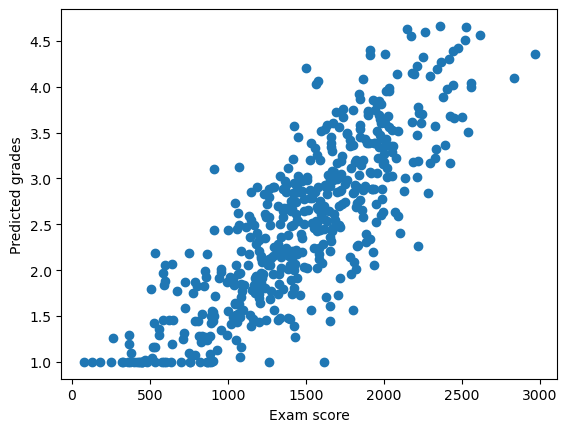

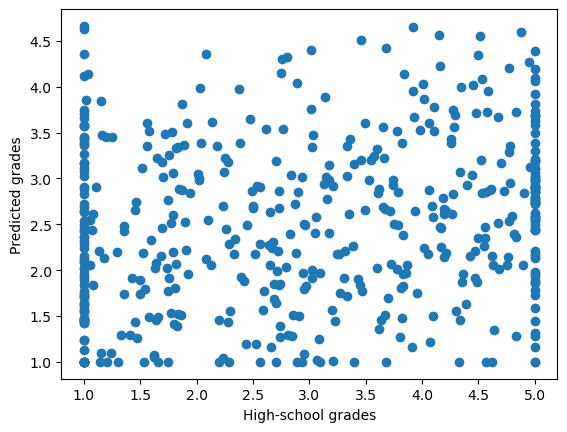

In [113]:
plt.scatter(exam_score, grades_y)
plt.xlabel("Exam score")
plt.ylabel("Predicted grades")
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("High-school grades")
plt.ylabel("Predicted grades")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [115]:
alpha = 0.01
d = 1

poly_d = PolynomialFeatures(d)
fi_grades = poly_d.fit_transform(grades_X)
ridge = Ridge(alpha)
ridge.fit(fi_grades, grades_y)
# ridge.coef_[0] = ridge.intercept_
print(ridge.coef_, ridge.intercept_)

[0.         0.00141497 0.09477276] 0.15061179575776018


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [118]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
grades_X_fixed = scaler_X.fit_transform(grades_X)

scaler_y = StandardScaler()
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

poly_d = PolynomialFeatures(d)
fi_grades = poly_d.fit_transform(grades_X_fixed)
ridge = Ridge(alpha)
ridge.fit(fi_grades, grades_y_fixed)
print(ridge.coef_, ridge.intercept_)


[[0.         0.81630375 0.15167761]] [8.07023426e-17]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [57]:
last_column = grades_X_fixed[:, -1].reshape(500, 1)
grades_X_fixed_colinear = np.hstack([grades_X_fixed, last_column])
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [58]:
alpha = 0.01
ridge = Ridge(alpha)
ridge.fit(grades_X_fixed_colinear, grades_y)
# ridge.coef_[0] = ridge.intercept_
print(ridge.coef_, ridge.intercept_)

[0.73954673 0.06870839 0.06870839] 2.5030316359918503


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [74]:
w1 = []
w2 = []
alpha1 = 0.01
alpha2 = 1000

for i in range(10):
    choice = np.random.choice(grades_X_fixed_colinear.shape[0], size=int(0.5 * grades_X_fixed_colinear.shape[0]), replace=True)
    grades_X_sampled = grades_X_fixed_colinear[choice]
    grades_y_sampled = grades_y[choice]
    ridge1 = Ridge(alpha1)
    ridge1.fit(grades_X_sampled, grades_y_sampled)
    w1.append(ridge1.coef_)
    
    ridge2 = Ridge(alpha2)
    ridge2.fit(grades_X_sampled, grades_y_sampled)
    w2.append(ridge2.coef_)
    
w1 = np.array(w1)
w2 = np.array(w2)
print(f"Standard deviation for each coefficient for lambda = 0.01: {np.std(w1, axis=0)}")
print(f"Standard deviation for each coefficient for lambda = 1000: {np.std(w2, axis=0)}")

Standard deviation for each coefficient for lambda = 0.01: [0.01790926 0.01626945 0.01626945]
Standard deviation for each coefficient for lambda = 1000: [0.0096417  0.00496968 0.00496968]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.